## Ejercicio 6-1: Validación Cruzada

Scikit-Learn permite realizar de manera sencilla la validación cruzada.

Para la división se crea un objeto de clase KFold con valor 5 (n_splits o numero de particiones).

Con esto se tiene 4/5=80% de datos de entrenamiento y 1/5=20% de datos de validación.

El método split de esta clase devuelve cada una de las particiones en forma de una lista de índices "train" que define el dataset de entrenamiento y otra "test" que define el de validación.

Se obtienen los datos de x e y utilizando el metodo "iloc" sobre estas listas.

Para cada partición se entrena el clasificador y se calculan las tasa de aciertos solo para el dataset de validación. 

A diferencia de los ejemplos anteriores, no se obtendrá la tasa de acierto para el dataset de entrenamiento.

Finalmente, se calcula la tasa de aciertos o accuracy rate global como la media aritmética de las tasas de aciertos para todas las particiones.

Para obtener siempre los mismos resultados, se da un valor True para el parámetro shuffle, y entonces el valor de random_state determina la ordenación de los índices. De esta manera, siempre que se ejecuta el programa, se obtienen los mismos resultados.
Se puede cambiar el valor de random_state para obtener resultados distintos, pero también reproducibles. Si no se especifica ningún valor para
random_state, se obtienen resultados distintos en cada ejecución.

Aclaración:

Cuando utilizas cv.split(x, y) de un objeto KFold, el método genera dos listas de índices para cada iteración:

- train: Índices de las filas utilizadas como entrenamiento.
- test: Índices de las filas utilizadas como prueba.

Detalles:
- train: Es una lista o array que contiene los índices de las filas seleccionadas para entrenamiento en una iteración específica.
- x.iloc[train]: Utiliza esos índices para acceder a las filas correspondientes del DataFrame x.

Por ejemplo, si train = [0,1,3,4,5,6,7,8,10,11,12,13,15,16,17,19], entonces x.iloc[train] devolverá las filas 0,1,3,4,5,6,7,8,10,11,12,13,15,16,17,19 del DataFrame x.

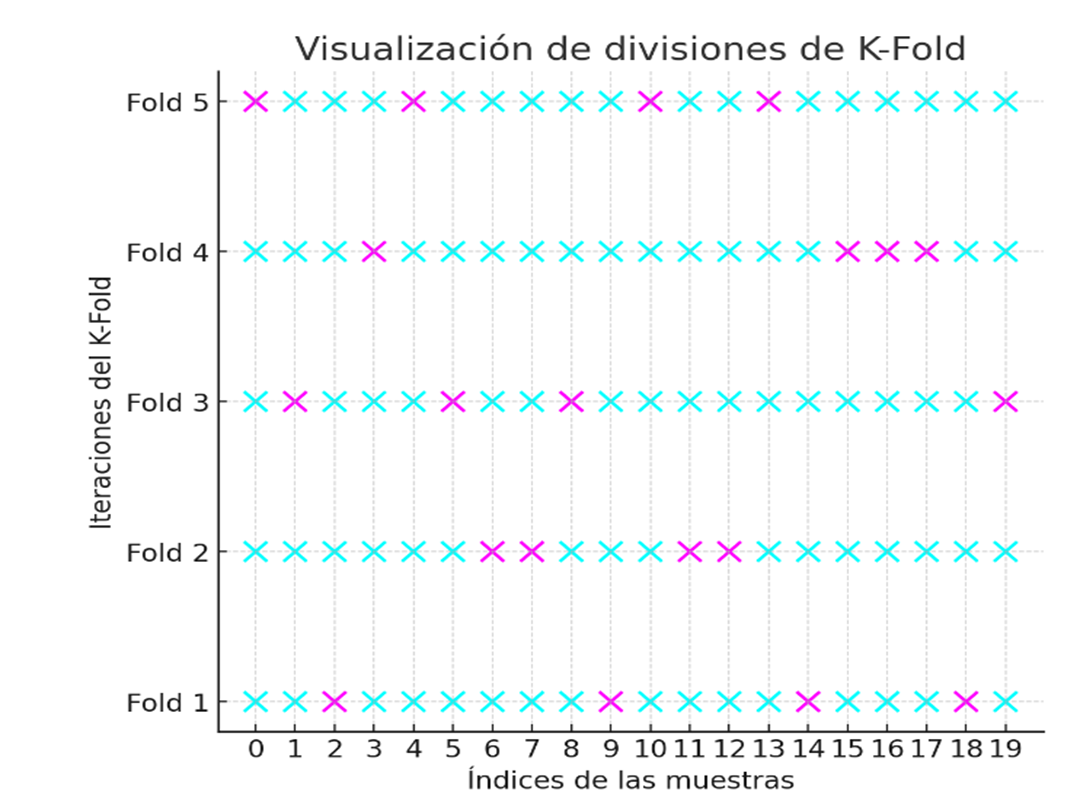

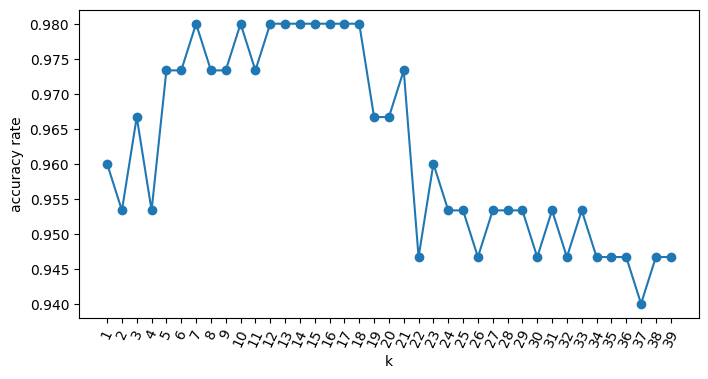

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

# Creamos el DataFrame y añadimos etiquetas a las columnas
df = pd.read_csv('./data/iris.csv', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# Obtenemos el Dataframe x con las features predictoras y el Dataframe y con la columna objetivo
x = df.drop(['class'], axis=1)
y = df['class']

# Definición de semilla aleatoria
RANDOM_SEED = 85

# Para la división se crea un objeto de clase KFold con valor 5, lo que supone crear 5 particiones (n_splits). 
# Con esto se tiene 4/5=80% de datos de entrenamiento y 1/5=20% de datos de validación. 
# Con el parametro shuffle = True "barajamos" los registros.
# cv almacena las 5 particiones creadas con los datos
cv = KFold(n_splits = 5, shuffle = True, random_state = RANDOM_SEED)

# test_acc_rates  almacenar en cada i la media de las tasas de acierto para cada vuelta k 
# Tener en cuenta que par cada vuelta k se lleva a cabo una validación cruzada de n_splits o particiones
test_acc_rates = [] 

# Entrenamos el algoritmo de k-NN probando con varios valores para el hiperparámetro k
for k in range(1,40):
  clf = KNeighborsClassifier(n_neighbors = k) # clasificicador inicializado con k=i
  fold_acc_rate = [] # Guardamos los distintos valores de la tasa de acierto para cada partición
  
  # Para cada valor de k-NN entrenamos y validamos con cada partición
  # La instrucción x.iloc[train] devuelve un subconjunto del dataset x que contiene únicamente las filas utilizadas 
  # como entrenamiento para una iteración específica del K-Fold.
  
  for train, test in cv.split(x, y): # El método split devuelve cada una de las particiones, en forma de una lista de índices 
    clf.fit(x.iloc[train], y.iloc[train]) # Entrenamos
    y_pred = clf.predict(x.iloc[test])    # Obtenemos la predicción
    acc_rate = accuracy_score(y.iloc[test], y_pred) # Obtenemos la tasa de acierto
    fold_acc_rate.append(acc_rate) # Añadimos a la lista
    
  test_acc_rates.append(sum(fold_acc_rate) / len(fold_acc_rate)) # Calculamos la media de las tasas de acierto obtenidas para cada partición
  
plt.figure(figsize=(8,4))
plt.xticks(np.arange(1,len(test_acc_rates)+1, step=1))
plt.plot(range(1,len(test_acc_rates)+1), test_acc_rates, marker='o')
plt.xlabel("k")
plt.ylabel("accuracy rate")
plt.gca().tick_params(axis='x', labelrotation=65)
plt.show()

### Ejercicio 6-2: Validación Cruzada con el dataset wine

Repite el ejercicio 6-1 pero ahora con el dataset wine y compara los resultados , activando y desactivando la opción shuffle.

Para ello:
1º carga los datos del dataset wine.\
2º lleva a cabo validación ruzada con la opción shuffle activa y obten los resultados de tasa de acierto para cada valor de k.\
3º lleva a cabo validación ruzada con la opción shuffle apagada y obten los resultados de tasa de acierto para cada valor de k.\
4º compara y discute los resultados obtenidos en ambos casos

Recuerda que cuando shuffle está a False, la semilla de aleatoriedad no es necesaria y hay que eliminar random_state= RANDOM_SEED de la llamada al metodo.